Missing Values:
 reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


C:\Users\asu\AppData\Local\Temp\ipykernel_13344\2410496943.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='overall', palette='viridis')


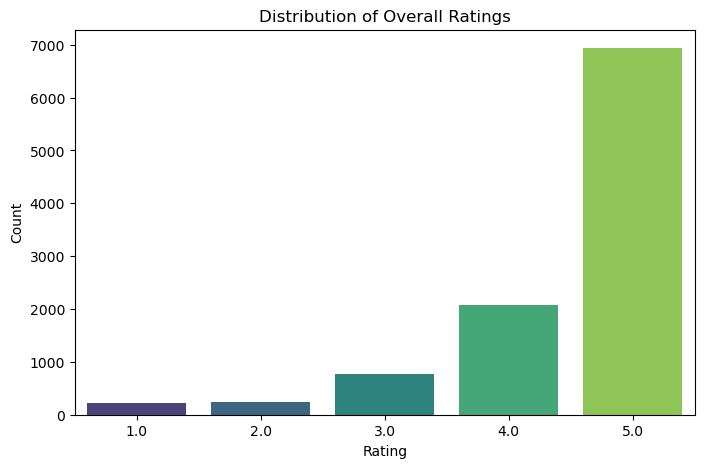

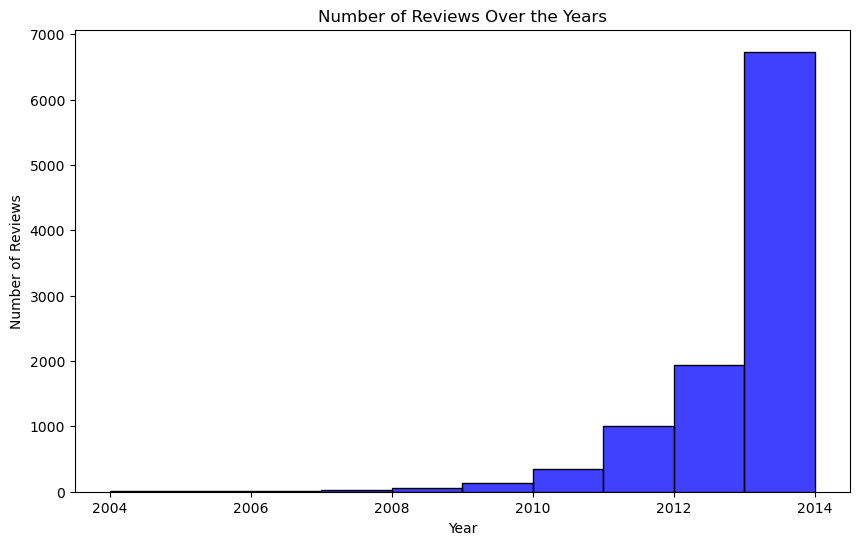

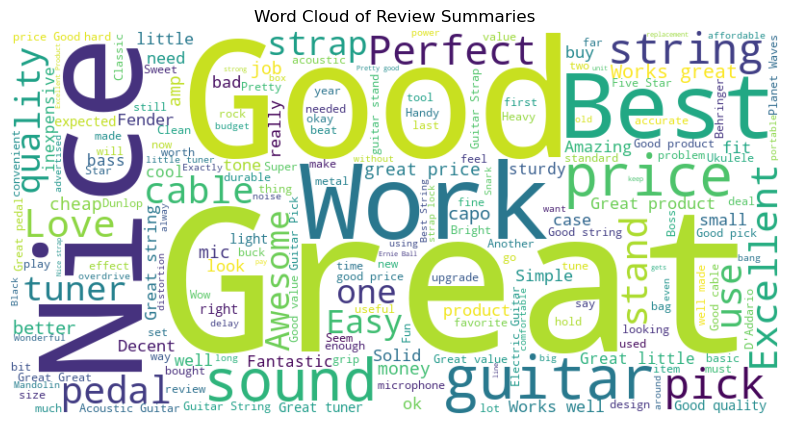

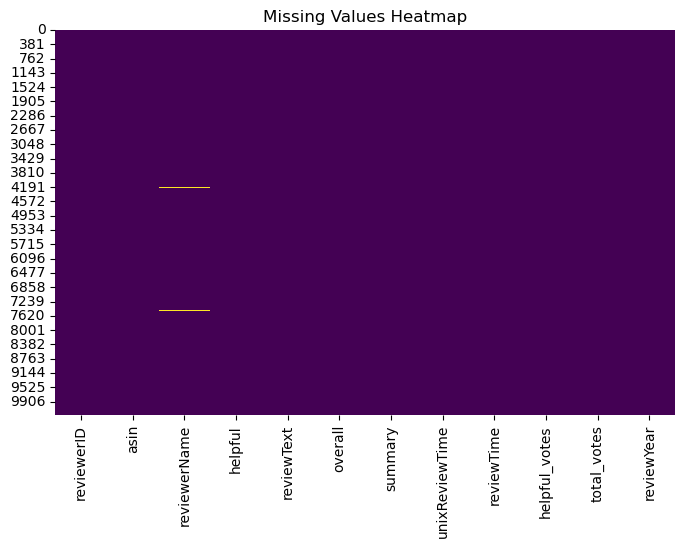

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
 9   helpful_votes   10261 non-null  int64  
 10  total_votes     10261 non-null  int64  
 11  reviewYear      10261 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 922.0+ KB
Dataset Overview After Processing:
 None


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 1: Load the dataset
file_path = (r"C:\Users\asu\Downloads\archive\Musical_instruments_reviews.csv")
data = pd.read_csv(file_path)

# Step 2: Handle Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 3: Parse 'helpful' column
# Ensure proper handling of 'helpful' values
data['helpful_votes'] = data['helpful'].apply(lambda x: int(x.strip('[]').split(',')[0]) if isinstance(x, str) else 0)
data['total_votes'] = data['helpful'].apply(lambda x: int(x.strip('[]').split(',')[1]) if isinstance(x, str) else 0)

# Step 4: Visualize Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='overall', palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Step 5: Temporal Analysis
data['reviewYear'] = pd.to_datetime(data['reviewTime'], errors='coerce').dt.year

plt.figure(figsize=(10, 6))
sns.histplot(data['reviewYear'].dropna(), bins=10, kde=False, color='blue')
plt.title('Number of Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Step 6: Text Analysis - Word Cloud for Review Summaries
summary_text = " ".join(data['summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()

# Step 7: Missing Values Visualization
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Summary of the dataset after processing
print("Dataset Overview After Processing:\n", data.info())


In [3]:
data.shape

(10261, 12)

In [3]:
data.isnull()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_votes,total_votes,reviewYear
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10256,False,False,False,False,False,False,False,False,False,False,False,False
10257,False,False,False,False,False,False,False,False,False,False,False,False
10258,False,False,False,False,False,False,False,False,False,False,False,False
10259,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Data Preparation
# Drop rows with missing reviewText or overall ratings
data = data.dropna(subset=['reviewText', 'overall'])

# Convert ratings to sentiment (1-3 = negative, 4 = neutral, 5 = positive)
def sentiment_category(rating):
    if rating <= 3:
        return 'negative'
    elif rating == 4:
        return 'neutral'
    else:
        return 'positive'

data['sentiment'] = data['overall'].apply(sentiment_category)

# Step 2: Feature Extraction
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(data['reviewText'])
y = data['sentiment']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Save the Model (Optional)
import pickle
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

print("Model and vectorizer saved.")


Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.19      0.29       248
     neutral       0.48      0.12      0.20       417
    positive       0.71      0.96      0.82      1386

    accuracy                           0.70      2051
   macro avg       0.63      0.42      0.44      2051
weighted avg       0.66      0.70      0.63      2051

Confusion Matrix:
 [[  46   17  185]
 [  10   52  355]
 [  11   40 1335]]
Model and vectorizer saved.


In [5]:
from flask import Flask, request, jsonify
import pickle

# Initialize the Flask app
app = Flask(__name__)

# Load the trained model and vectorizer
with open('sentiment_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

@app.route('/')
def home():
    return "Welcome to the Sentiment Analysis API!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON input
        input_data = request.json
        review_text = input_data.get('reviewText', '')

        # Check if input is valid
        if not review_text:
            return jsonify({'error': 'Invalid input. "reviewText" field is required.'}), 400

        # Preprocess and predict
        vectorized_text = vectorizer.transform([review_text])
        prediction = model.predict(vectorized_text)[0]

        # Return prediction
        return jsonify({'reviewText': review_text, 'sentiment': prediction})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    # Run the app on localhost and port 5000
    app.run(host='0.0.0.0', port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.65:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\asu\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
